In [2]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mmq import metodo_minimos_quadrados




In [1]:
rm = pyvisa.ResourceManager()
rm.list_resources()[0]


NameError: name 'pyvisa' is not defined

In [3]:
my_instrument = rm.open_resource(rm.list_resources()[0])
my_instrument.query('*IDN?') #comunicação com dispositivo
my_instrument.query('FREQ?') #devolve a frequencia de comunicação

'12340\n'

In [4]:
my_instrument.write('FREQ 12340')

12

In [5]:
my_instrument.query('FREQ?')

'12340\n'

In [6]:
#leitura da tensão seno 
float(my_instrument.query('SLVL?').rstrip())

0.19900001585

In [7]:
my_instrument.write('SLVL 0.00031')

14

In [8]:
A=0.002
my_instrument.write(f'SLVL {A}')
#aqui eu basicamente to falando o valor que o seno vai ter

12

In [9]:
#aqui eu seto se eu vou ler o A ou o A-B, o A é quando é 0 e A-B quando é 1
my_instrument.write('ISRC 0')

8

In [10]:
#Aqui a gente le uma entrada ou outra, no caso consegue ler qualquer valor 
my_instrument.query('OUTP? X')

'6.3102316972e-07\n'

In [11]:
import numpy as np
primeiro_valor=0;
ultimo_valor=1;
passo=0.01;
a=np.arange(primeiro_valor, ultimo_valor, passo)
a

#aqui eu to criando o vetor de todos os valores de tensão que eu vou colocar
#lembrar de criar um vetor com as medidas de tensão na saída 

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [ ]:
#coisa extramamente importante é fazer um auto phase antes de qualquer medida, senao ele pode zerar o x e a gente ta medindo ele 

In [ ]:
my_instrument.write('APHS')

In [ ]:
#Fazer uma medida de tensão e achar o valor de resistencia 

In [17]:
Rdut=[]
Vdut=[]
idut=[]
R=1
R_pot=1
my_instrument.write('APHS')
for t in a:
    my_instrument.write(f'SLVL {t}') #pega os valores que tão em a e coloca no seno 
    v = float(my_instrument.query('OUTP? X'.rstrip())) #le o valor sem aspas
    Vdut.append(v)
    req = (v*R)/(t-v)
    R = (req*R_pot)/(R_pot-req)
    Rdut.append(R)
    idut.append(v/R)

In [19]:
  Vdut  idut

0.15376791358

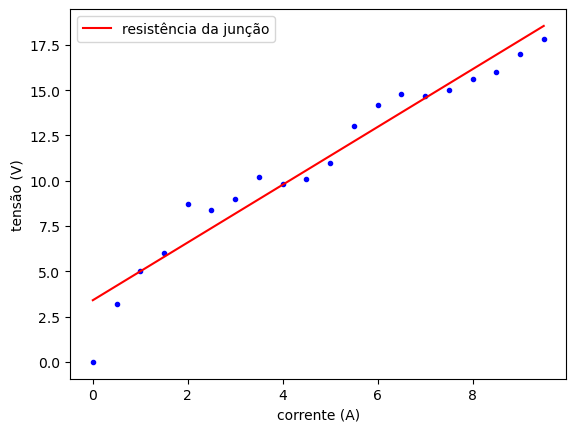

2.2746766917293244

In [4]:
plt.plot(idut,Vdut,'b.')

plt.xlabel('corrente (A)')
plt.ylabel('tensão (V)')
A,B = metodo_minimos_quadrados.mmq(idut, Vdut, 1)
plt.plot(idut,idut*A+B,'r',label='resistência da junção')

R = (A*idut[10]+B)/idut[10]

plt.legend()
plt.show()
R

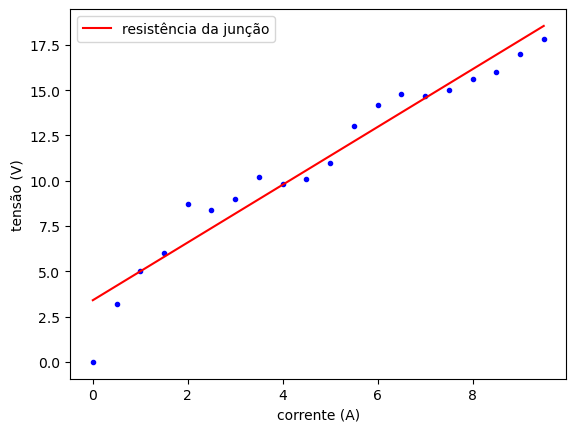

2.2746766917293244

In [3]:
a=np.arange(0,10,0.5)
b=[0,3.2,5,6,8.7,8.4,9,10.2,9.8,10.1,11,13,14.2,14.8,14.7,15,15.6,16,17,17.8]
plt.plot(a,b,'b.')

plt.xlabel('corrente (A)')
plt.ylabel('tensão (V)')
A,B=metodo_minimos_quadrados.mmq(a, b, 1)
plt.plot(a,A*a+B,'r',label='resistência da junção')

R = (A*a[10]+B)/a[10]

plt.legend()
plt.show()
R